In [13]:
import os
import re
import math
import matplotlib.pyplot as plt
import numpy as np

### First I want to load in and do a time lapse curvature plot

In [14]:
ims_path = "/Users/iandavenport/Desktop/research/projects/stability/vids/python_vids/g66_t3_c8/full_processed/extracted_data/"
files = []
for filename in os.listdir(ims_path):
    if filename.endswith(".npz"):
        im_file = os.path.join(ims_path, filename)
        files.append(im_file)


def extract_num_from_npy_string(string):
    numbers = re.findall("[0-9]+", string[-9:])
    numbers = int(numbers[0])
    return numbers


fnames = sorted(files, key=extract_num_from_npy_string)

In [15]:
# format is cropped image, interpolated line, interpolation points, curvature, and crop points!
cropped_images = []
interpolated_lines = []
interpolation_points = []
curvatures = []
# crop_points = []

In [16]:
for f in fnames:
    arr = np.load(f)
    cropped_images.append(arr["arr_0"])
    interpolated_lines.append(arr["arr_1"])
    interpolation_points.append(arr["arr_2"])
    curvatures.append(arr["arr_3"])
    # crop_points.append(arr["arr_4"])

In [17]:
# curvatures = [np.clip(curvature_arr, a_min=0, a_max=0.9) for curvature_arr in curvatures]

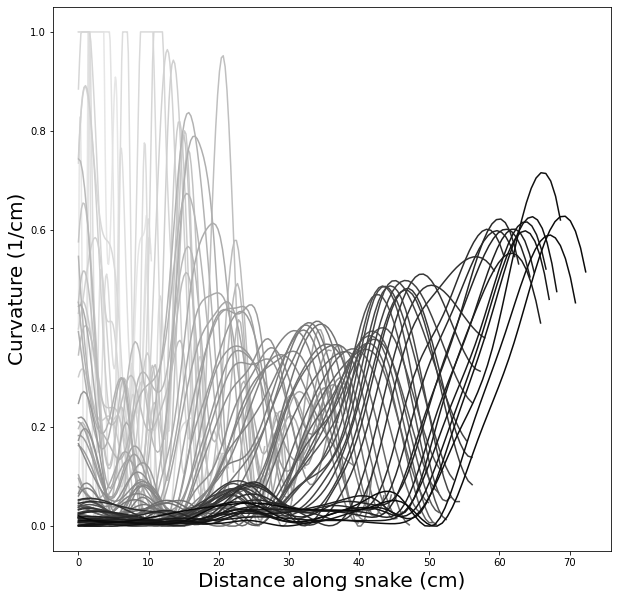

In [18]:
n = len(cropped_images) + 10
plt.figure(figsize=(10, 10))
for i in range(len(cropped_images)):
    plt.plot(
        interpolation_points[i],
        np.clip(curvatures[i], a_min=0, a_max=1),
        color=(0.9 - i / n, 0.9 - i / n, 0.9 - i / n),
    )

# plt.legend()
plt.xlabel("Distance along snake (cm)", fontsize=20)
plt.ylabel("Curvature (1/cm)", fontsize=20)
# plt.show()
plt.savefig(ims_path + "/time_lapse.png")

In [19]:
# fig, ax = plt.subplots(24, 2, figsize=(30, 30))
# for i in range(len(cropped_images)):
#     row = math.floor(i / 2)
#     if i % 2 == 0:
#         ax[row, 0].imshow(cropped_images[i], cmap="gray")
#         ax[row, 0].axis("off")
#     else:
#         ax[row, 1].imshow(cropped_images[i], cmap="gray")
#         ax[row, 1].axis("off")
# #     if i == 12:
# #         ax[row, 1].imshow(cropped_images[i], cmap="gray")
# #         ax[row, 1].axis("off")
# # plt.show()
# plt.savefig("time_snake_viz.png")